<a href="https://colab.research.google.com/github/anupa-aa/ML-AI-Courswork-Module/blob/master/Anupa_Adikary_ex2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1 (Optional)**. complete math derivation for logistic regression objective.

We use the following loss function for binary classification problems:
$-\sum_{i=1}^n y_i \log \hat{y}_i + (1-y_i) \log (1-\hat{y}_i)$ where $\hat{y_i} = s(x_i^\top w)$ where $s()$ is shorthand of $sigmoid$. This loss is known as cross entropy loss.

**Derive this loss function by MLE.**

Step 1. Choose a probability distribution to model the binary random variable. A natural choice is Bernoulli distribution: $P(y|x) = \mu(x)^y (1-\mu(x))^{(1-y)}$ where $\mu(x)$ is the conditional mean $E[Y|x]$.

Step 2. Specify/parameterize the function $\mu(x)$ by using the training parameter $w$: $\mu(x; w) = E[Y|x] = sigmoid(x^\top w) = \frac{1}{1+e^{x^\top w}}$. (In contrast, in linear regression we simply define $E[Y|x]=x^\top w$).

**Optimizing this obj. You may read to complete next question** Note: this objective function does not have a closed form solution. We will use gradient descent to optimize this objective function. You will learn optimization later today or tomorrow.

Gradient descent works as follows. Assume you want to minimize loss function $c(w)$. Then you simply do $w \gets w - \alpha \nabla c(w)$ until the sequence converge, where $\alpha$ is the learning rate.

Here is a quick intuition for why this updating rule would reduce $c(w)$. Let's do first-order Taylor expansion around the point $w+\Delta w$:
$$
c(w+\Delta w)\approx c(w) + \nabla c(w)^\top \Delta w.
$$
Then it is easy to see that if the two vectors $\nabla c(w), \Delta w$ form an acute angle, $c(w+\Delta w) \ge c(w)$; if they form an abtuse angle, $c(w+\Delta w) \le c(w)$. As a result, the steepest ascent/descent direction achieved when $\Delta w \propto (+/-)\nabla c(w)$. Learning rate matters a lot as the taylor approximation may be highly inaccurate if we move too far away from $w$.

Back to the previous cross-entropy loss for binary classification, could you compute the gradient by yourself? (optional)
The correct answer is (the gradient on the whole dataset (X, Y)): $X^\top (s(X w)- Y)$.

**Question 2.**

Expectation: A working solution where the learned class label using Logistic Regression is similar to the training class label. You only need to add code at those TODOs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)

    plt.show()

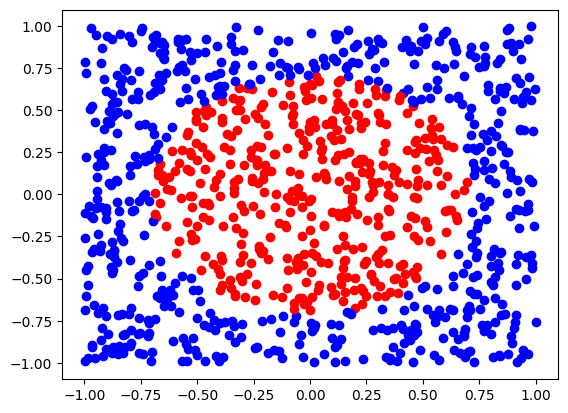

(2, 1000)
(1, 1000)


In [ ]:
num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
y=X[0,:]**2+X[1,:]**2-0.5>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [ ]:
X = X.T
y = y.T

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

# define the loss function here
# eps is a smooth parameter
def loss(yhat, y):

  eps = 1e-10

  return -np.sum(y*np.log(yhat+eps) + (1-y)*np.log(1-yhat+eps))




In [ ]:
M = 3
Xbig = []
for i in range(M+1):
  for j in range(M+1):
    Xbig.append(X[:,0]**i * X[:, 1]**j)


Xbig = np.array(Xbig).T


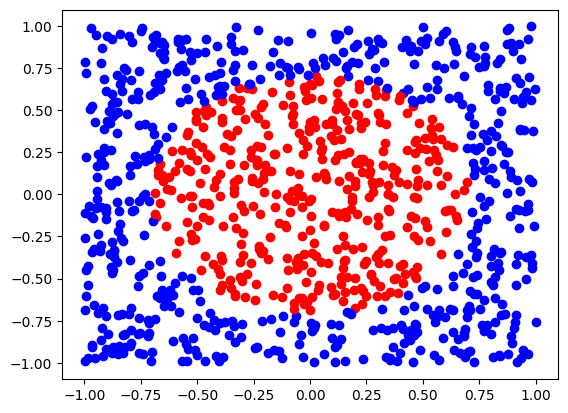

<Figure size 640x480 with 0 Axes>

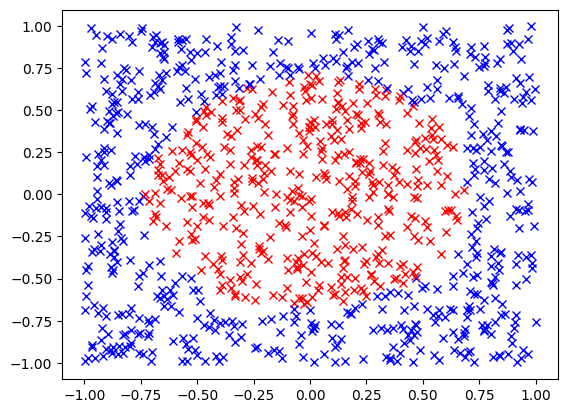

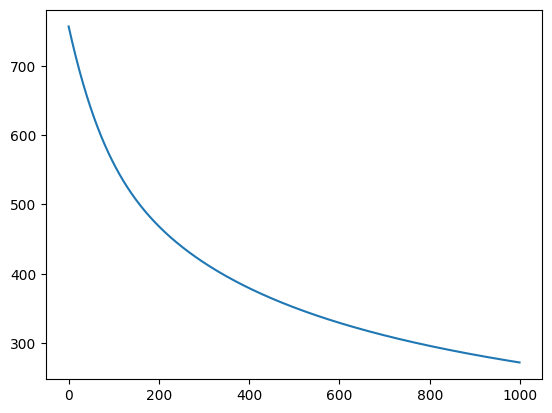

In [ ]:
# w is theat
w = np.random.randn(Xbig.shape[1], 1)
lr = 0.0001

ls = []
for i in range(1000):
  # TODO: compute yhat here
  yhat = sigmoid(np.matmul(Xbig, w))
  l = loss(yhat, y)

  # TODO: this is the gradient
  dw = np.matmul(Xbig.T, yhat - y)

  # TODO: update the w here with learning rate lr
  w = w - lr*dw
  ls.append(l)


plotClass(X.T, y.T, 'o')
plt.figure()
plotClass(X.T, (yhat.T>0.5), 'x')

plt.figure()
plt.plot(ls)